# Finding best markets to advertise

We're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

## Understanding the data

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# Reading the dataset
survey_data = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")

survey_data.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
survey_data.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,...,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,22.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,26.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,32.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,90.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


The data set is a part of 2017 FreeCodeCamp survey of more than 20000 developers. This data set gives an idea about how the developers are learning to code. This data set is available in <a href="https://github.com/freeCodeCamp/2017-new-coder-survey">this</a> repository.

## Check for sample representability

Let us figure out whether the sample we have is representative for our population of interest by considering the JobRoleInterest column which represents the role(s) the developers are interested in working.

In [60]:
# Generating a frequency table
job_role_interest_freq = survey_data["JobRoleInterest"].value_counts(normalize=True)
job_role_interest_freq

Full-Stack Web Developer                                                                                                                                                                                                                                                    0.117706
  Front-End Web Developer                                                                                                                                                                                                                                                   0.064359
  Data Scientist                                                                                                                                                                                                                                                            0.021739
Back-End Web Developer                                                                                                                                                   

From this frequency table generated, it can seen that the people are interested in more than one subject matter.

In [61]:
# Let us split the job role interests in list
more_than_one_interest = survey_data['JobRoleInterest'].dropna().str.split(',')
count_more_than_one_interest = more_than_one_interest.apply(lambda x: len(x))
count_more_than_one_interest

1         1
2         5
3         3
4         5
6         1
9         6
11        4
13        3
14        1
15        1
16        1
18        4
19        4
21        1
22        1
23        1
28        1
29        4
30        2
31        1
32        3
33        2
34        2
35        4
37        2
40        6
41        1
42        1
43        3
52       12
         ..
18080     2
18081     3
18088     1
18089     1
18090     7
18093     2
18097     4
18098     2
18099     1
18107     1
18111     2
18112     5
18113     2
18118     3
18125     2
18129     1
18130     6
18131     3
18151     1
18153     2
18154     1
18155     2
18156     1
18157     6
18160     1
18161     1
18162     3
18163     4
18171    13
18174     3
Name: JobRoleInterest, Length: 6992, dtype: int64

In [62]:
count_more_than_one_interest.value_counts(normalize=True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

There are more number of people who are interested in only 1 role. It can seen that there are people who aspire to learn/knows the skillsets needed for 13 roles.

In [63]:
# Focus on Web and Mobile development
web_or_mobile_dev = survey_data["JobRoleInterest"].dropna().str.contains("Web Developer|Mobile Developer")
web_or_mobile_dev_freq = web_or_mobile_dev.value_counts(normalize=True) * 100
web_or_mobile_dev_freq

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

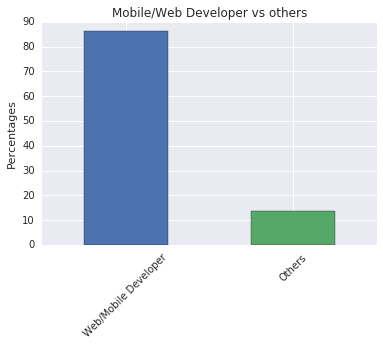

In [64]:
# Graph for web and mobile developer job roles vs other roles frequency
web_or_mobile_dev_freq.plot.bar()
plt.title("Mobile/Web Developer vs others")
plt.ylabel("Percentages")
plt.xticks([0, 1], ["Web/Mobile Developer", "Others"], rotation=45)
plt.show()

From this graph generated, it is seen that the number of people interested in Web and Mobile development roles constitute about 86% of the total population whereas the other roles are preferred by less number of people for their learning. There is more demand for Web and Mobile development skills.

## New Coders - Location and densities

In [65]:
# Get non null job interests data
non_null_job_data = survey_data[survey_data["JobRoleInterest"].notnull()].copy() 

In [66]:
# Absolute and relative Frequency table for CountryLive column - Country that the people currently reside
absolute_freq_country = non_null_job_data["CountryLive"].value_counts()
relative_freq_country = non_null_job_data["CountryLive"].value_counts(normalize=True) * 100

pd.DataFrame(data = {"Absolute frequency": absolute_freq_country, "Relative Frequency": relative_freq_country})

,Absolute frequency,Relative Frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


From the frequency table generated, the potential countries to advertise in are USA, India, UK and Canada. These countries have large number of potential customers compared to other countries. Also the courses are written in English, and English is an official language in these four countries. The more people that know English, the better our chances to target the right people with our ads.

Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us. So, we need to look at the amount spent by these people for studying.

## Spending money for learning

In [67]:
# Compute money spent per month
non_null_job_data["MonthsProgramming"].replace(0, 1, inplace=True)
non_null_job_data['MoneyPerMonth'] = non_null_job_data['MoneyForLearning'] / non_null_job_data['MonthsProgramming']
non_null_job_data['MoneyPerMonth']

1           13.333333
2          200.000000
3            0.000000
4            0.000000
6            0.000000
9            5.555556
11           0.000000
13                NaN
14                NaN
15           0.000000
16          16.666667
18          35.714286
19          17.857143
21         100.000000
22         285.714286
23         100.000000
28           2.416667
29                NaN
30          66.666667
31           0.000000
32         100.000000
33          83.333333
34                NaN
35           0.000000
37                NaN
40          25.000000
41           0.000000
42          50.000000
43           0.000000
52           0.000000
             ...     
18080       25.000000
18081             NaN
18088      182.000000
18089        0.000000
18090        0.000000
18093       27.777778
18097        0.000000
18098        1.222222
18099     1000.000000
18107      275.000000
18111      200.000000
18112        0.000000
18113        0.000000
18118        0.000000
18125     

In [68]:
# Remove null rows in MoneyPerMonth and Country Live Columns
non_null_job_data["MoneyPerMonth"].isnull().sum()

675

In [69]:
non_null_job_data = non_null_job_data[non_null_job_data['MoneyPerMonth'].notnull()]
non_null_job_data = non_null_job_data[non_null_job_data["CountryLive"].notnull()]
non_null_job_data['CountryLive'].value_counts()

United States of America         2933
India                             463
United Kingdom                    279
Canada                            240
Poland                            122
Germany                           114
Brazil                            111
Australia                         102
Ukraine                            79
Russia                             79
Nigeria                            72
Spain                              66
Romania                            65
France                             62
Netherlands (Holland, Europe)      59
Italy                              52
Serbia                             44
Philippines                        43
Ireland                            41
Greece                             40
South Africa                       36
Mexico                             33
Turkey                             31
New Zealand                        30
Hungary                            30
Norway                             30
Argentina   

In [70]:
mean_non_null_job_data = non_null_job_data.groupby("CountryLive").mean()
mean_non_null_job_data["MoneyPerMonth"][["United States of America", 'India', "United Kingdom", "Canada"]]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

After creating mean distribution for the survey data based on the country, USA and India spends the most money on learning the skills.

## Dealing with extreme outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



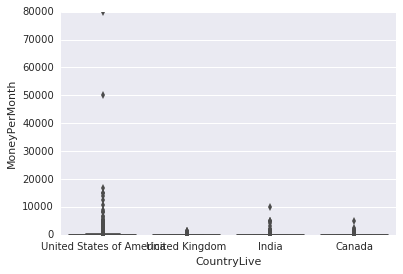

In [71]:
# Generating box plots for these 4 countries
import seaborn as sns
top_4 = non_null_job_data[non_null_job_data["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada")]
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=top_4)

There are outliers in USA and India. Let us set a limit of less than 10000.

In [72]:
non_null_job_data = non_null_job_data[non_null_job_data["MoneyPerMonth"] < 10000]

In [73]:
# Compute mean after removing outliers
mean_non_null_job_data = non_null_job_data.groupby("CountryLive").mean()
mean_non_null_job_data["MoneyPerMonth"][["United States of America", 'India', "United Kingdom", "Canada"]]

CountryLive
United States of America    155.459187
India                       113.748387
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



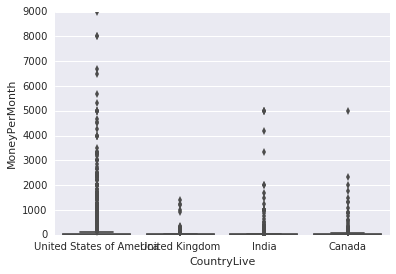

In [74]:
import seaborn as sns
top_4 = non_null_job_data[non_null_job_data["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada")]
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=top_4)

In [75]:
# Compute Indian outliers
india_outliers = top_4[(top_4['CountryLive'] == 'India') &  (top_4['MoneyPerMonth'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


In [76]:
top_4 = top_4.drop(india_outliers.index)

In [77]:
# Compute oulier for USA
us_outliers = top_4[(top_4['CountryLive'] == 'United States of America') &  (top_4['MoneyPerMonth'] >= 6000)]
top_4 = top_4.drop(us_outliers.index)
# Remove people not attended bootcamp
never_attented_bootcamp = top_4[(top_4['CountryLive'] == 'United States of America') & (top_4['MoneyPerMonth'] >= 6000) &(top_4['AttendedBootcamp'] == 0)]
top_4 = top_4.drop(never_attented_bootcamp.index)
# Remove people with experience less than 3 months
less_than_3_months = top_4[(top_4['CountryLive'] == 'United States of America') & (top_4['MoneyPerMonth'] >= 6000) & (top_4['MonthsProgramming'] <= 3)]
top_4 = top_4.drop(less_than_3_months.index)


In [78]:
# Removing canada outliers
canada_outliers = top_4[(top_4['CountryLive'] == 'Canada') & (top_4['MoneyPerMonth'] > 4500)]
top_4 = top_4.drop(canada_outliers.index)

In [79]:
top_4.groupby('CountryLive').mean()['MoneyPerMonth']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



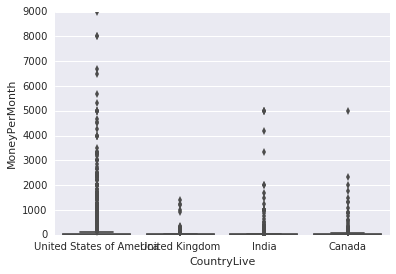

In [80]:
import seaborn as sns
top_4 = non_null_job_data[non_null_job_data["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada")]
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=top_4)

In [81]:
top_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.884793
India                       11.827957
United Kingdom               7.142857
Canada                       6.144393
Name: CountryLive, dtype: float64

## Choosing the two best markets

Obviously, one country we should advertise in is the US as it wins in terms of number of potential customers and the amount spent per month in the courses. But now, there is a conflict between whether to choose between Canada and India. In terms of population strength, India wins whereas in terms of money spent per month, Canada triumphs. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

So, there are three choices we could consider for advertising,
<ol>
<li> Advertise in USA, India and Canada by splitting the cost of advertising three ways
<li> Advertise in USA and India
<li> Advertise in USA and Canada
</ol>

If we are provided with some extra information like exact money split-up of the course, number of months the courses are for free etc in the form of a dataset, we could provide analysis of the best markets to advertise with better accuracy. 

## Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.